In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Change the path according to your file location
df = pd.read_excel('/Users/athanasioskaravangelis/Desktop/RSM BAM/Workshop/data/Palm_oil_prices_cleaned.xlsx')

In [56]:
# Adjust date format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.head()

,Date,Palmkernel oil (CIF Rotterdam),Coconut oil (CIF Rotterdam),"Palm oil, crude (CIF NWE)",Palm olein (FOB Malaysia),Palm stearin (CIF Rotterdam),"Tallow, edible (FOB US Gulf)","Soybean Oil, edible (ZLZ2)",(Bio)-Ethanol,Fatty Alcohol C12-14 FOB Asia (USD/ton),Fatty Alcohol C16-18 FOB Asia (USD/ton),Fatty Alcohol C12-14 FD NWE (EUR/ton),RSPO (EUR/ton),Year,MYR_USD_rate
0,2006-01-01,606,569,424,NaN,454,424,NaN,NaN,NaN,NaN,NaN,NaN,2006,0.266740
1,2006-02-01,623,591,445,NaN,471,414,NaN,NaN,NaN,NaN,NaN,NaN,2006,0.268340
2,2006-03-01,592,575,440,NaN,471,410,NaN,NaN,NaN,NaN,NaN,NaN,2006,0.270026
3,2006-04-01,576,578,439,NaN,474,394,NaN,NaN,NaN,NaN,NaN,NaN,2006,0.273095
4,2006-05-01,560,583,440,NaN,478,408,NaN,NaN,NaN,NaN,NaN,NaN,2006,0.276913


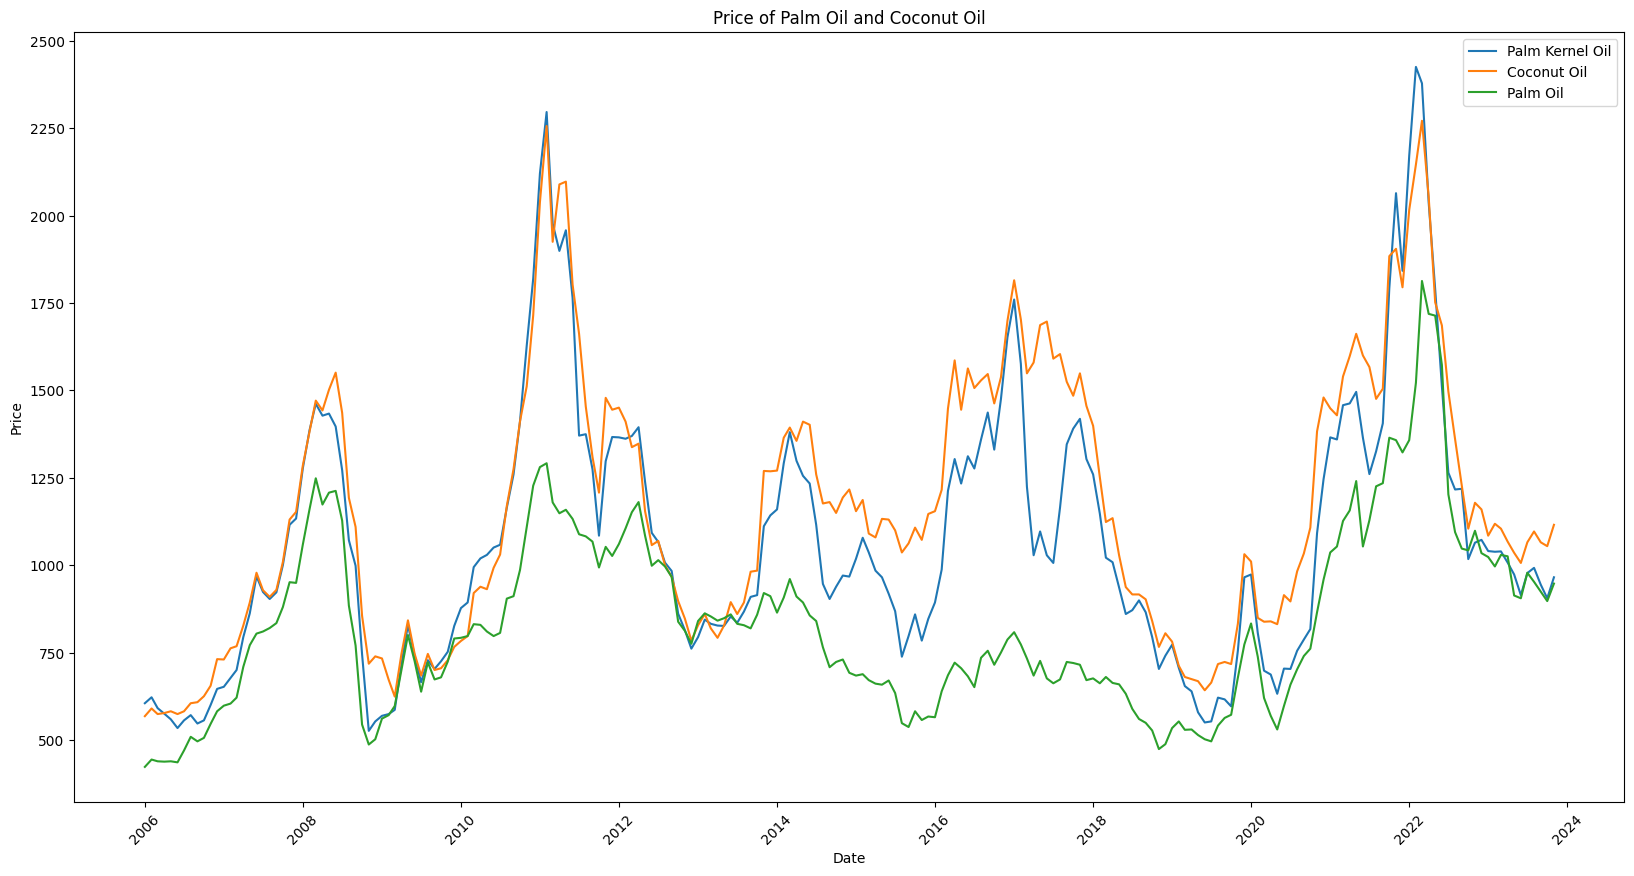

In [57]:
# Create plot for the price of palm oil and coconut oil and fatty alcohols
plt.figure(figsize=(20, 10))
plt.plot(df['Date'], df['Palmkernel oil (CIF Rotterdam)'], label='Palm Kernel Oil')
plt.plot(df['Date'], df['Coconut oil (CIF Rotterdam)'], label='Coconut Oil')
plt.plot(df['Date'], df['Palm oil, crude (CIF NWE)'], label='Palm Oil')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.title('Price of Palm Oil and Coconut Oil')
plt.legend()
plt.show()

### Function to help us with plotting between specific dates

/var/folders/35/tbpcvh252s9dy7dhvwv499800000gn/T/ipykernel_1839/725984129.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_year['Date'], rotation=45)


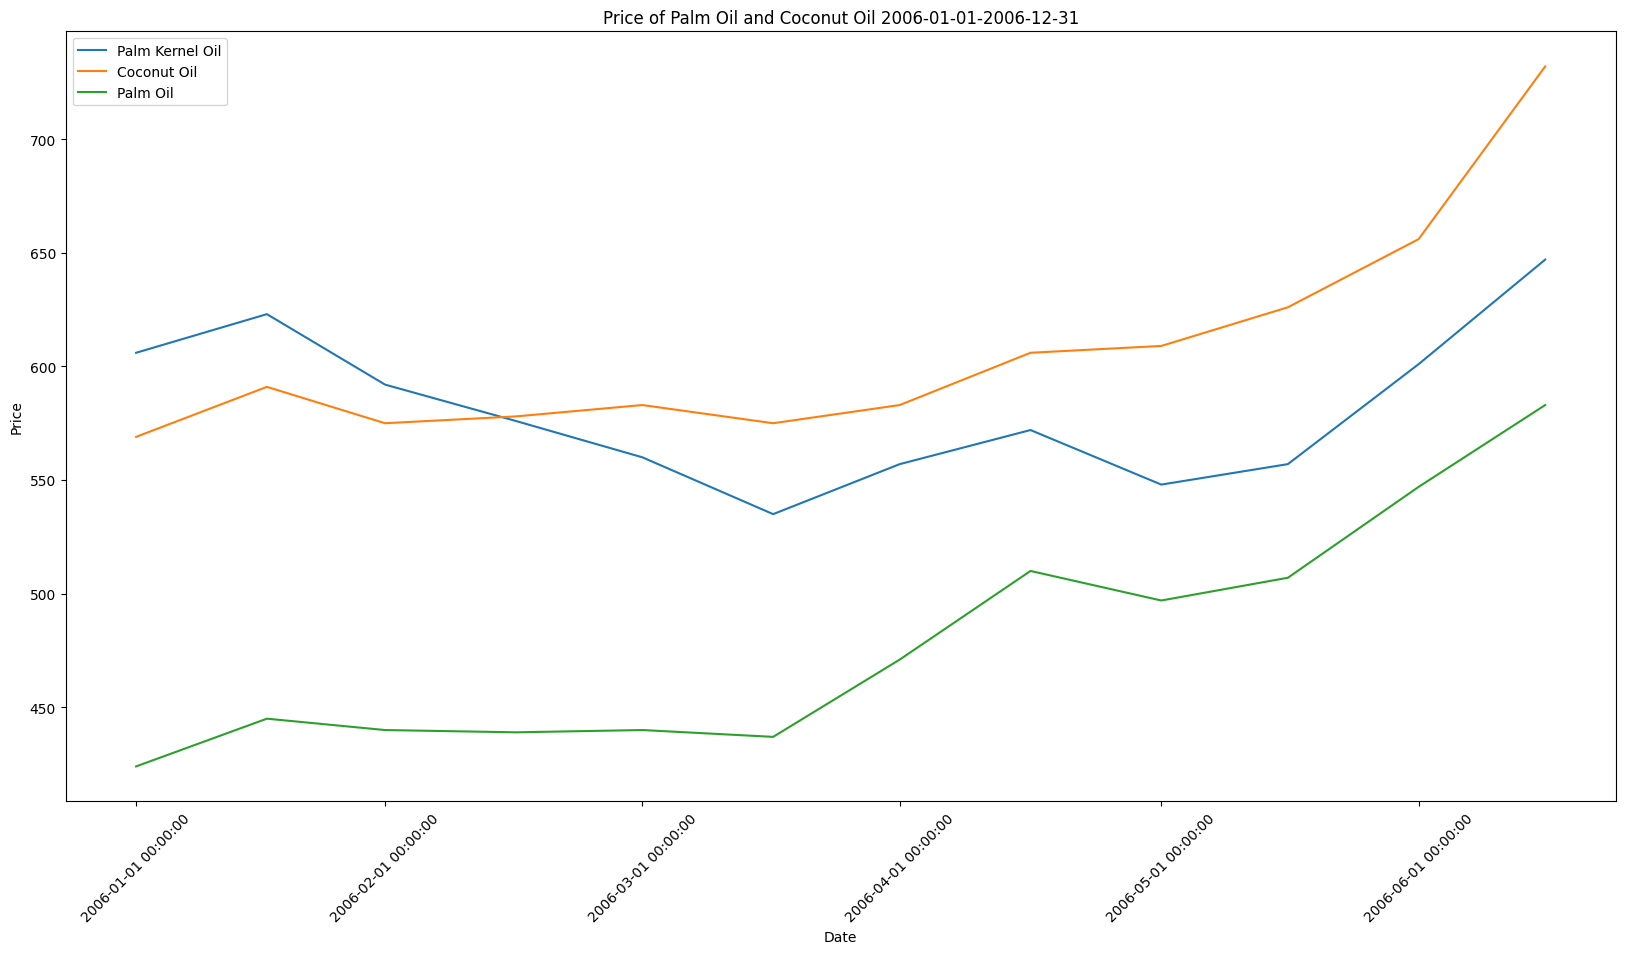

In [33]:
def plot_every_two_years(start_year, end_year, ax):
    df_year = df[(df['Date'] >= start_year) & (df['Date'] <= end_year)]
    ax.plot(df_year['Date'], df_year['Palmkernel oil (CIF Rotterdam)'], label='Palm Kernel Oil')
    ax.plot(df_year['Date'], df_year['Coconut oil (CIF Rotterdam)'], label='Coconut Oil')
    ax.plot(df_year['Date'], df_year['Palm oil, crude (CIF NWE)'], label='Palm Oil')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_xticklabels(df_year['Date'], rotation=45)
    ax.set_title(f'Price of Palm Oil and Coconut Oil {start_year}-{end_year}')
    ax.legend()

# create figure without subplots
fig, ax = plt.subplots(figsize=(20, 10))

# plot data
plot_every_two_years('2006-01-01', '2006-12-31', ax)

## Merge data with average monthly exchange rates MYR to USD

In [49]:
ex_rates = pd.read_csv('/Users/athanasioskaravangelis/Desktop/RSM BAM/Workshop/data/MYR_USD_average_exchange_rates.csv')
ex_rates['Date'] = pd.to_datetime(ex_rates['Date'])
# rename column price
ex_rates['MYR_USD_rate'] = ex_rates['Price']
ex_rates = ex_rates.drop(columns=['Price'])
ex_rates.head()

/var/folders/35/tbpcvh252s9dy7dhvwv499800000gn/T/ipykernel_1839/2505335364.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ex_rates['Date'] = pd.to_datetime(ex_rates['Date'])


,Date,MYR_USD_rate
0,2006-01-01,0.266740
1,2006-02-01,0.268340
2,2006-03-01,0.270026
3,2006-04-01,0.273095
4,2006-05-01,0.276913


In [50]:
# merge dataframes based on date and keep only MYR_USD_rate
df = pd.merge(df, ex_rates, on='Date', how='left')

In [51]:
df.head()

,Date,Palmkernel oil (CIF Rotterdam),Coconut oil (CIF Rotterdam),"Palm oil, crude (CIF NWE)",Palm olein (FOB Malaysia),Palm stearin (CIF Rotterdam),"Tallow, edible (FOB US Gulf)","Soybean Oil, edible (ZLZ2)",(Bio)-Ethanol,Fatty Alcohol C12-14 FOB Asia (USD/ton),Fatty Alcohol C16-18 FOB Asia (USD/ton),Fatty Alcohol C12-14 FD NWE (EUR/ton),RSPO (EUR/ton),Year,MYR_USD_rate_x,MYR_USD_rate_y
0,2006-01-01,606,569,424,NaN,454,424,NaN,NaN,NaN,NaN,NaN,NaN,2006,0.266740,0.266740
1,2006-02-01,623,591,445,NaN,471,414,NaN,NaN,NaN,NaN,NaN,NaN,2006,0.268340,0.268340
2,2006-03-01,592,575,440,NaN,471,410,NaN,NaN,NaN,NaN,NaN,NaN,2006,0.270026,0.270026
3,2006-04-01,576,578,439,NaN,474,394,NaN,NaN,NaN,NaN,NaN,NaN,2006,0.273095,0.273095
4,2006-05-01,560,583,440,NaN,478,408,NaN,NaN,NaN,NaN,NaN,NaN,2006,0.276913,0.276913


In [53]:
df.to_csv('/Users/athanasioskaravangelis/Desktop/RSM BAM/Workshop/data/Palm_oil_prices_cleaned.csv', index=False)

In [52]:
df

,Date,Palmkernel oil (CIF Rotterdam),Coconut oil (CIF Rotterdam),"Palm oil, crude (CIF NWE)",Palm olein (FOB Malaysia),Palm stearin (CIF Rotterdam),"Tallow, edible (FOB US Gulf)","Soybean Oil, edible (ZLZ2)",(Bio)-Ethanol,Fatty Alcohol C12-14 FOB Asia (USD/ton),Fatty Alcohol C16-18 FOB Asia (USD/ton),Fatty Alcohol C12-14 FD NWE (EUR/ton),RSPO (EUR/ton),Year,MYR_USD_rate_x,MYR_USD_rate_y
0,2006-01-01,606,569,424,NaN,454,424,NaN,NaN,NaN,NaN,NaN,NaN,2006,0.266740,0.266740
1,2006-02-01,623,591,445,NaN,471,414,NaN,NaN,NaN,NaN,NaN,NaN,2006,0.268340,0.268340
2,2006-03-01,592,575,440,NaN,471,410,NaN,NaN,NaN,NaN,NaN,NaN,2006,0.270026,0.270026
3,2006-04-01,576,578,439,NaN,474,394,NaN,NaN,NaN,NaN,NaN,NaN,2006,0.273095,0.273095
4,2006-05-01,560,583,440,NaN,478,408,NaN,NaN,NaN,NaN,NaN,NaN,2006,0.276913,0.276913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2023-07-01,978,1066,979,894.0,930,1510,NaN,2.31,1312.50,1216.25,1410.0,258.75,2023,0.217762,0.217762
211,2023-08-01,993,1097,953,872.0,921,1643,NaN,2.29,1499.00,1293.00,1410.0,233.00,2023,0.216783,0.216783
212,2023-09-01,945,1066,925,846.0,883,1685,NaN,2.26,1432.50,1353.75,1410.0,230.00,2023,0.213476,0.213476
213,2023-10-01,906,1055,898,817.0,870,1685,NaN,2.23,1318.75,1367.50,1505.0,220.00,2023,0.210564,0.210564


## Investigate relationship of exchange rate and PKO

/var/folders/35/tbpcvh252s9dy7dhvwv499800000gn/T/ipykernel_1839/645102488.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['Date'], rotation=45)


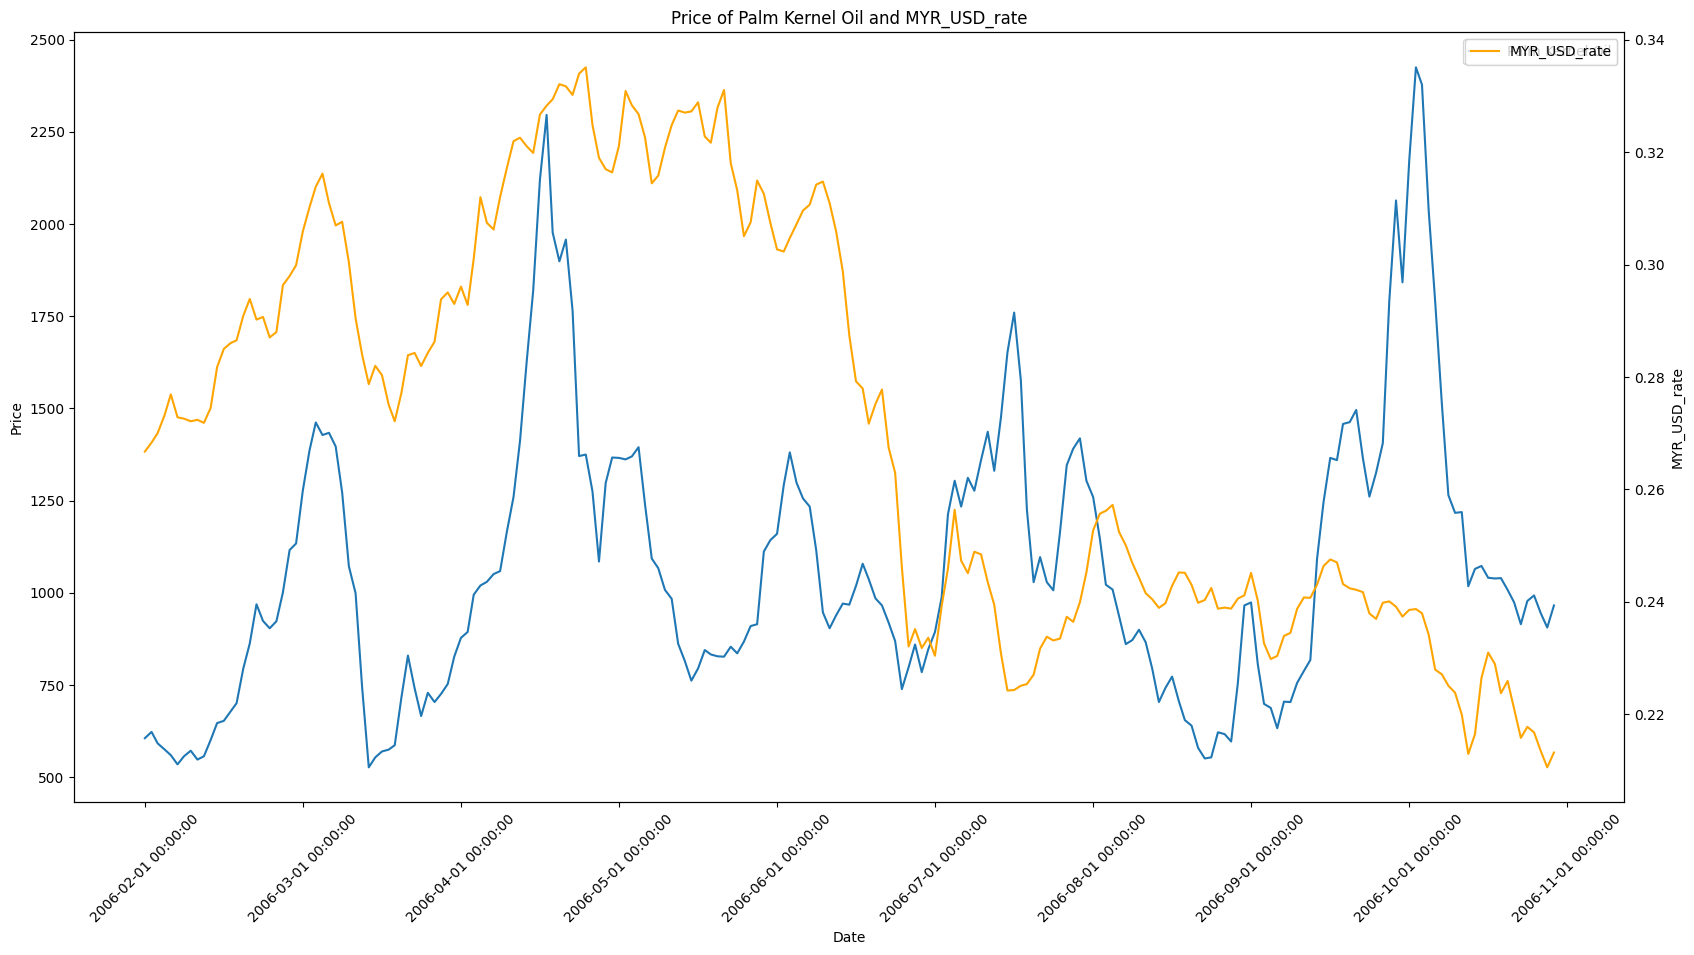

In [58]:
# help me investigate the relationship between palm kernel oil price and MYR_USD_rate
# create plot with date as x-axis and palm kernel oil price and MYR_USD_rate as two y-axis
# plot all the data
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.plot(df['Date'], df['Palmkernel oil (CIF Rotterdam)'], label='Palm Kernel Oil')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.set_xticklabels(df['Date'], rotation=45)
ax1.set_title('Price of Palm Kernel Oil and MYR_USD_rate')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(df['Date'], df['MYR_USD_rate'], color='orange', label='MYR_USD_rate')
ax2.set_ylabel('MYR_USD_rate')
ax2.legend()
plt.show()